In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import statsmodels.graphics.gofplots as sm
from statsmodels.stats.diagnostic import lilliefors
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train['SalePrice'] = np.log(train['SalePrice'])
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [4]:
d = train.isnull().sum().sort_values(ascending = False).iloc[0:11].index
train = train.drop(d, axis = 1)
numerical = train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

In [5]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

train[skewed_feats] = np.log1p(train[skewed_feats])

In [6]:
train = train.fillna(train.mean());

C:\Users\38595\AppData\Local\Temp/ipykernel_24948/3887431207.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean());


In [7]:
train = train.fillna(train.mean())
train = pd.get_dummies(train)
train

C:\Users\38595\AppData\Local\Temp/ipykernel_24948/735019796.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,1457,3.044522,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,0,1,0
1457,1458,4.262680,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,1459,3.044522,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,0,1,0


In [8]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse.mean())

In [9]:
selected = ["TotalBsmtSF", "GarageArea", "OverallQual", "GrLivArea", "FullBath", "YearBuilt", "YearRemodAdd"]
X = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

In [10]:
alphas = [0.01, 0.02, 0.03, 0.05]
cv_lasso = [rmse_cv(LassoCV(alphas=[alpha]).fit(X, y), X, y)
            for alpha in alphas]

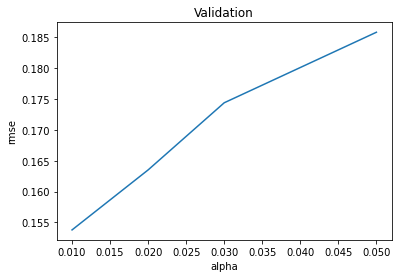

In [11]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [12]:
alphas = [0.05, 0.1, 0.3, 0.5, 0.7, 1, 2, 5, 10, 20, 30, 50]
cv_ridge = [rmse_cv(Ridge(alpha = alpha).fit(X, y), X, y)
            for alpha in alphas]
cv_ridge

[0.13585314297181023,
 0.1348356659774726,
 0.13236117060390906,
 0.13098077712440265,
 0.13007375309925465,
 0.1291604741366441,
 0.12763588385966815,
 0.12632126384009118,
 0.12608630400950901,
 0.12689044539360703,
 0.12800312406165051,
 0.13015110966691562]

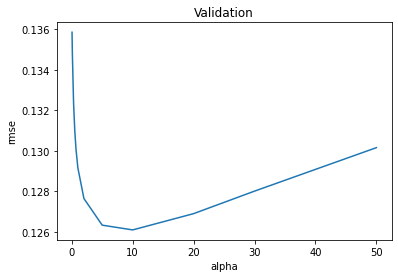

In [13]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [14]:
X = train[selected]
mali_model = Ridge(alpha = 0.01).fit(X, y)
rmse_cv(mali_model, X, y)
y.shape

(1460,)

#Interakcije

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

categorical = train.drop(numerical.columns, axis=1)

In [16]:
train_full = train.copy()
for cat_name in categorical.columns:
    for num_name in numerical.columns:
        train_full[num_name+'*'+cat_name] = train[num_name]*train[cat_name]

C:\Users\38595\AppData\Local\Temp/ipykernel_24948/1067869975.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train_full[num_name+'*'+cat_name] = train[num_name]*train[cat_name]


In [17]:
train_full

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF*SaleCondition_Partial,OpenPorchSF*SaleCondition_Partial,EnclosedPorch*SaleCondition_Partial,3SsnPorch*SaleCondition_Partial,ScreenPorch*SaleCondition_Partial,PoolArea*SaleCondition_Partial,MiscVal*SaleCondition_Partial,MoSold*SaleCondition_Partial,YrSold*SaleCondition_Partial,SalePrice*SaleCondition_Partial
0,1,4.110874,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,2,3.044522,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2,3,4.110874,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,4,4.262680,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,5,4.110874,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1456,1457,3.044522,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1457,1458,4.262680,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1458,1459,3.044522,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [18]:
X = train.copy()[selected]

In [19]:
X['HasGarage'] = (train['GarageArea'] > 0)
X['HasBasement'] = (train['TotalBsmtSF'] > 0)
X['WasRemodeled'] = (train['YearBuilt']<train['YearRemodAdd'])

In [20]:
X['HasGarage*GrLivArea'] = X['HasGarage']*X['GrLivArea'];
X['HasBasement*GrLivArea'] = X['HasBasement']*X['GrLivArea'];
zone = ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']
for zona in zone:
    X['LotArea*'+zona] = train['LotArea']*train[zona]
    X['GarageArea*'+zona] = train['GarageArea']*train[zona]
y.shape

(1460,)

In [21]:
srednji_model = Ridge(alpha = 10).fit(X, y)
rmse_cv(srednji_model, X, y)
srednji_model.predict(X)

array([12.27114949, 12.00169899, 12.34084277, ..., 12.27782462,
       11.81404284, 11.82296651])

In [34]:
test_data = pd.read_csv('test.csv')
test = test_data.copy()


In [35]:
test[skewed_feats] = np.log1p(test[skewed_feats])

In [36]:
test = test.drop(d, axis = 1)
test = test.fillna(test.mean())
test = pd.get_dummies(test)
test

C:\Users\38595\AppData\Local\Temp/ipykernel_24948/1569818928.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = test.fillna(test.mean())


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,3.044522,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1,1462,3.044522,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,1463,4.110874,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,1464,4.110874,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,1465,4.795791,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,7.568896,4,7,1970,1970,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1455,2916,5.081404,7.546974,4,5,1970,1970,0.000000,5.533389,0.000000,...,0,0,0,1,1,0,0,0,0,0
1456,2917,3.044522,9.903538,5,7,1960,1996,0.000000,7.110696,0.000000,...,0,0,0,1,1,0,0,0,0,0
1457,2918,4.454347,9.253591,5,5,1992,1992,0.000000,5.823046,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [37]:
test2 = test.copy()[selected]
test2['HasGarage'] = (test['GarageArea'] > 0)
test2['HasBasement'] = (test['TotalBsmtSF'] > 0)
test2['WasRemodeled'] = (test['YearBuilt']<test['YearRemodAdd'])

In [38]:
test2['HasGarage*GrLivArea'] = test2['HasGarage']*test['GrLivArea'];
test2['HasBasement*GrLivArea'] = test2['HasBasement']*test['GrLivArea'];
zone = ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']
for zona in zone:
    test2['LotArea*'+zona] = test['LotArea']*test[zona]
    test2['GarageArea*'+zona] = test['GarageArea']*test[zona]
# x = test.drop(['Id'], axis=1)
# li1 = list(X.columns)
# li2 = list(x.columns)
# a = list(set(li1) - set(li2))
# b = list(set(li2) - set(li1))

In [39]:
# x[a] = 0
# x.shape
# x = x.reindex(columns=X.columns)

In [40]:
y_predtest = srednji_model.predict(test2)
y_predtest

array([11.63408963, 11.95870118, 12.09031258, ..., 12.00852947,
       11.70800588, 12.34828467])

In [45]:
y_zavrsen = np.exp(y_predtest)

In [46]:
y_zavrsen

array([112881.02043545, 156170.11622506, 178137.78133031, ...,
       164148.94038194, 121540.87231195, 230564.20879979])

In [49]:
test3 = pd.read_csv('test.csv')
test3['SalePrice'] = y_zavrsen

In [51]:
test3[['Id', 'SalePrice']].to_csv('sumb.csv', index=False)